<a href="https://colab.research.google.com/github/lucasnbd/1TSCG-DbSuporte/blob/main/Aula_08_KMeans_pre_processamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

def normalizar(x): #x será uma lista de valores numéricos
  return (x - np.min(x))/(np.max(x) - np.min(x))

def padronizar(x):
  return (x -np.mean(x))/np.std(x)

df = pd.read_csv("/home/iris.data", names=['sepal_length','sepal_width',
                                     'petal_length','petal_width',
                                     'class'])
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
import seaborn as sb
#sb.pairplot(df, hue='class')

In [ ]:

from scipy.stats import shapiro
# Verificar normalidade usando o teste de Shapiro-Wilk
def verifica_normalidade(dataframe, coluna):
    coluna_data = dataframe[coluna]
    # Realizar o teste de Shapiro-Wilk
    statistic, p_valor = shapiro(coluna_data)
    # Definir o nível de significância
    nivel_significancia = 0.1
    # Verificar se a hipótese nula de normalidade pode ser rejeitada
    if p_valor > nivel_significancia:
        print(f"A coluna '{coluna}' segue uma distribuição normal")
        return True
    else:
        print(f"A coluna '{coluna}' não segue uma distribuição normal")
        return False

In [ ]:
entradas = df.drop('class', axis=1)
entradas.head(1)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2


In [ ]:
entradas.columns.to_list()

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [ ]:
saida = df['class']
saida.head(1)

0    Iris-setosa
Name: class, dtype: object

In [ ]:
for coluna in entradas.columns.to_list():
  if verifica_normalidade(entradas, coluna):
    entradas[coluna] = padronizar(entradas[coluna])#se for distribuição normal, padroniza
  else:#senão, normaliza
    entradas[coluna] = normalizar(entradas[coluna])

A coluna 'sepal_length' não segue uma distribuição normal
A coluna 'sepal_width' não segue uma distribuição normal
A coluna 'petal_length' não segue uma distribuição normal
A coluna 'petal_width' não segue uma distribuição normal


In [ ]:
entradas

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [ ]:
print("Coluna       |Máx  |   Min")
for colum in entradas.columns.to_list():
  print(colum,"|", entradas[colum].max(),"|", entradas[colum].min() )
  print("____________________________")

Coluna       |Máx  |   Min
sepal_length | 1.0 | 0.0
____________________________
sepal_width | 1.0 | 0.0
____________________________
petal_length | 1.0 | 0.0
____________________________
petal_width | 1.0 | 0.0
____________________________


In [ ]:
#sepal_length   sepal_width   petal_length   petal_width
#[   5.1,        3.5,             1.4,         0.2,          Iris-setosa ]
compr_sepal = (5.1 - 4.3) / (7.9 - 4.3)
larg_sepal =  (3.5 - 2.0) / (4.4 - 2.0)
compr_petal = (1.4 - 1.0) / (6.9 - 1.0)
larg_petal =  (0.2 - 0.1) / (2.5 - 0.1)
x = [compr_sepal, larg_sepal, compr_petal, larg_petal]
x

[0.22222222222222213,
 0.6249999999999999,
 0.06779661016949151,
 0.04166666666666667]

In [ ]:
#!pip install skimpy
from skimpy import skim
skim(entradas)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 150    │ │ float64     │ 4     │                                                          │
│ │ Number of columns │ 4      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name       ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25      ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ sepal_length      │    0 │      0 │   0.43 │   0.23 │    0 │     0.22 │   0.42 │   0.58 │      1 │ ▃▇▇▅▃▁  │  │
│ │ sepal_width       │    0 │      0 │   0.44 │   0.18 │    0 │     0.33 │   0.42 │   0.54 │      1 │ ▂▆▇▆▂▁  │  │
│ │ petal_length      │    0 │      0 │   0.47 │    0.3 │    0 │      0.1 │   0.57 │   0.69 │      1 │ ▇ ▂▇▆▂  │  │
│ │ petal_width       │    0 │      0 │   0.46 │   0.32 │    0 │    0.083 │    0.5 │   0.71 │      1 │ ▇ ▂▆▅▃  │  │
│ └───────────────────┴──────┴────────┴────────┴────────┴──────┴──────────┴────────┴────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

df = np.array(entradas)
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [ ]:
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [ ]:
exemplo = np.array(entradas.iloc[[0]])
previsao = kmeans.predict(exemplo)
print(f"Previsão {previsao} Valor real: {saida.iloc[0]}")

Previsão [0] Valor real: Iris-setosa


In [ ]:
def soma_quadrados_intra_clusters(dataset):
  wcss = []
  for n in range(2, 21):
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(dataset)
    wcss.append(kmeans.inertia_)
  return wcss


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Soma dos quadrados intra-clusters')

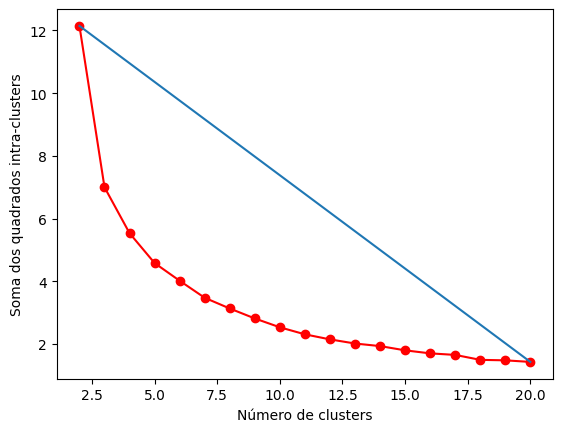

In [ ]:
n_clusters = list(range(2,21))
somas = soma_quadrados_intra_clusters(df)
plt.plot(n_clusters, somas, '-o', color='red')
plt.plot([2,20], [somas[0], somas[-1]])
plt.xlabel('Número de clusters')
plt.ylabel("Soma dos quadrados intra-clusters")

In [ ]:
def numero_otimo_clusters(wcss):
  x0=1
  y0=wcss[0]
  x1=20
  y1=wcss[-1]

  distancias = []

  for i in range(len(wcss)):
    x = i+2
    y = wcss[i]

    numerador = abs((y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0)
    denominador = ((y1-y0)**2 + (x1-x0)**2)**0.5
    distancias.append(numerador/denominador)
  print(distancias)
  return distancias.index(max(distancias))+2

In [ ]:
k = numero_otimo_clusters(somas)
k

[0.49127960354619216, 3.4992458866495357, 4.284230596430418, 4.62283541394009, 4.622839143656321, 4.604824619735107, 4.411061919261622, 4.196671326819556, 3.95097038792479, 3.6550304704117593, 3.3040705767638237, 2.9276230612297955, 2.5079476392816127, 2.134675192276152, 1.7273914458569521, 1.2790885495035427, 0.9248133588567309, 0.4472895714274188, 1.414883034106484e-15]


6